In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

## how to use cv2

In [20]:
img = cv2.imread("EO1H1170432005156110PZ_B029_L1GST.TIF")
img.shape # 7051*1891
img # dim=3, cv2 shows bgr respectively

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## merge 3 bands to a true-color image

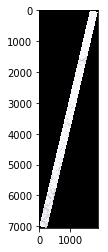

In [5]:
"""We have a hyperion image with 242 bands downloaded from the USGS EarthExplorer website.
   We want to yield a true-color image by adding the RGB channels with 3 specific bands.
   We add band29、20、12 to our RGB channels."""

import numpy as np
import cv2
import matplotlib.pyplot as plt

def merge_TIFF():
    r = cv2.imread("EO1H1170432005156110PZ_B029_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    g = cv2.imread("EO1H1170432005156110PZ_B020_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    b = cv2.imread("EO1H1170432005156110PZ_B012_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    
    """Create a blank image with 3 channels 
    and the same number of pixels as original input"""
    RGB_img = np.zeros((r.shape[0], r.shape[1], 3))
    
    """Add the RGB channels to the image"""
    RGB_img[:,:,0] = b 
    RGB_img[:,:,1] = g 
    RGB_img[:,:,2] = r 
    
    """Save the RGB image"""
    plt.imshow(RGB_img)
    cv2.imwrite('RGB.png', RGB_img)
    
if __name__ == '__main__':
    merge_TIFF()

## gamma correction (non-linear)

gamma = 3


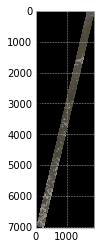

In [11]:
"""If the output image is approximate low illumination, we can use gamma correction to get an enhancement result."""

def illuminate_image():
    def adjust_gamma(image, gamma=1.0):
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 
                          for i in np.arange(0, 256)]).astype("uint8")
    
        return cv2.LUT(image, table)
    
    x = 'RGB.png'                     # original image
    original = cv2.imread(x, 1)
    
    gamma = float(input("gamma = "))  # change the value to get different result
    adjusted = adjust_gamma(original, gamma=gamma)
    plt.imshow(adjusted)
    cv2.imwrite('RGB_adjusted.png', adjusted)

if __name__ == '__main__':
    illuminate_image()

## normalize the pixel value in each band

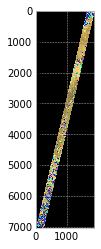

In [23]:
"""We have another solution to solve the low illuminaton problem."""

import numpy as np
import cv2
import matplotlib.pyplot as plt

def merge_TIFF():
    r = cv2.imread("EO1H1170432005156110PZ_B029_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    g = cv2.imread("EO1H1170432005156110PZ_B020_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    b = cv2.imread("EO1H1170432005156110PZ_B012_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    
    """Create a blank image with 3 channels 
    and the same number of pixels as original input"""
    RGB_img = np.zeros((r.shape[0], r.shape[1], 3))
    
    """Add the RGB channels to the image
    after normalizing each band and timimg 255"""
    RGB_img[:,:,0] = b / max([max(i)for i in r]) * 255
    RGB_img[:,:,1] = g / max([max(i)for i in r]) * 255
    RGB_img[:,:,2] = r / max([max(i)for i in r]) * 255
    
    """Save the RGB image after normalization"""
    plt.imshow(RGB_img)
    cv2.imwrite('RGB_normalization.png', RGB_img)
    
if __name__ == '__main__':
    merge_TIFF()

## standardize the pixel value in each band

In [18]:
"""We have another solution to solve the low illuminaton problem."""

import numpy as np
import cv2
import matplotlib.pyplot as plt

def merge_TIFF():
    r = cv2.imread("EO1H1170432005156110PZ_B029_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    g = cv2.imread("EO1H1170432005156110PZ_B020_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    b = cv2.imread("EO1H1170432005156110PZ_B012_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    
    """Create a blank image with 3 channels 
    and the same number of pixels as original input"""
    RGB_img = np.zeros((r.shape[0], r.shape[1], 3))
    
    """Add the RGB channels to the image
    after standardizing each band and timimg 255/3=85"""
    RGB_img[:,:,0] = (b-np.mean(b)) / np.std(b) * 85 
    RGB_img[:,:,1] = (g-np.mean(g)) / np.std(g) * 85 
    RGB_img[:,:,2] = (r-np.mean(r)) / np.std(r) * 85 
    
    """Save the RGB image after normalization"""
#     plt.imshow(RGB_img)
    cv2.imwrite('RGB_standardization.png', RGB_img)
    
if __name__ == '__main__':
    merge_TIFF()

## agjust the pixel value in each band by multiple a constant (linear)

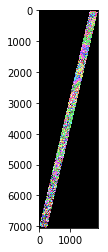

In [9]:
"""We have another solution to solve the low illuminaton problem."""

import numpy as np
import cv2
import matplotlib.pyplot as plt

def merge_TIFF():
    r = cv2.imread("EO1H1170432005156110PZ_B029_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    g = cv2.imread("EO1H1170432005156110PZ_B020_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    b = cv2.imread("EO1H1170432005156110PZ_B012_L1GST.TIF", cv2.IMREAD_GRAYSCALE)
    
    """Create a blank image with 3 channels 
    and the same number of pixels as original input"""
    RGB_img = np.zeros((r.shape[0], r.shape[1], 3))
    
    """Add the RGB channels to the image
    after normalizing each band and timimg 255"""
    RGB_img[:,:,0] = b * 3.5
    RGB_img[:,:,1] = g * 3.5
    RGB_img[:,:,2] = r * 3.5
    
    """Save the RGB image after normalization"""
    plt.imshow(RGB_img)
    cv2.imwrite('RGB_times3.5.png', RGB_img)
    
if __name__ == '__main__':
    merge_TIFF()

## compare different types of lanscape

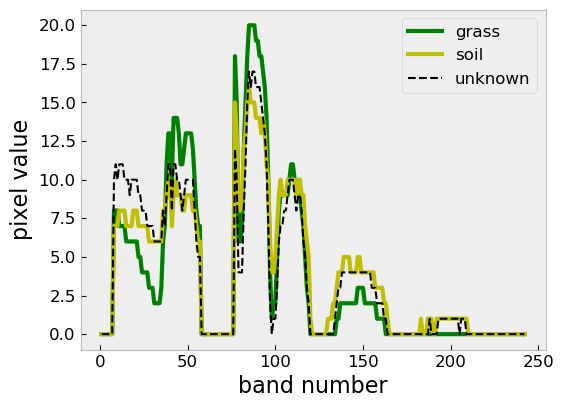

In [26]:
"""We want to demonstrate the pixel value in each band of different types of landscape (grass and soil). 
Then select an unknown area (either grass or soil) and show its pixel value to check its type of landscape."""

%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

x = np.arange(1,243)            # the band number in array
grass = []
soil = []
unknown = []
row_g, column_g = (872, 1483)   # the coordinate of the grass pixel
row_s, column_s = (2724, 1221)  # the coordinate of the soil pixel
row_u, column_u = (4431, 822)   # the coordinate of the unknown area pixel
for i in range(1,243):
    name = "EO1H1170432005156110PZ_B{}_L1GST.TIF".format("%03d"%i)
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    pv_g = img[row_g][column_g]
    pv_s = img[row_s][column_s] 
    pv_u = img[row_u][column_u]
    grass.append(pv_g)
    soil.append(pv_s)
    unknown.append(pv_u)

plt.style.use("bmh")
plt.figure(figsize = (6, 4.5), dpi = 100)  
plt.xlabel("band number", fontsize = 16)
plt.ylabel("pixel value", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(False) 
plt.plot(x, grass, "g-", linewidth = 3, label = "grass")
plt.plot(x, soil, "y-", linewidth = 3, label = "soil")
plt.plot(x, unknown, "k--", linewidth = 1.5, label = "unknown")
plt.legend(prop={'size': 12})
plt.savefig('bmh.png')

In [20]:
wavelength = [ 355.59,  365.76,  375.94,  386.11,  396.29,  406.46,  416.64,  426.82, 
 436.99,  447.17,  457.34,  467.52,  477.69,  487.87,  498.04,  508.22, 
 518.39,  528.57,  538.74,  548.92,  559.09,  569.27,  579.45,  589.62, 
 599.80,  609.97,  620.15,  630.32,  640.50,  650.67,  660.85,  671.02, 
 681.20,  691.37,  701.55,  711.72,  721.90,  732.07,  742.25,  752.43, 
 762.60,  772.78,  782.95,  793.13,  803.30,  813.48,  823.65,  833.83, 
 844.00,  854.18,  864.35,  874.53,  884.70,  894.88,  905.05,  915.23, 
 925.41,  935.58,  945.76,  955.93,  966.11,  976.28,  986.46,  996.63, 
1006.81, 1016.98, 1027.16, 1037.33, 1047.51, 1057.68,  851.92,  862.01, 
 872.10,  882.19,  892.28,  902.36,  912.45,  922.54,  932.64,  942.73, 
 952.82,  962.91,  972.99,  983.08,  993.17, 1003.30, 1013.30, 1023.40, 
1033.49, 1043.59, 1053.69, 1063.79, 1073.89, 1083.99, 1094.09, 1104.19, 
1114.19, 1124.28, 1134.38, 1144.48, 1154.58, 1164.68, 1174.77, 1184.87, 
1194.97, 1205.07, 1215.17, 1225.17, 1235.27, 1245.36, 1255.46, 1265.56, 
1275.66, 1285.76, 1295.86, 1305.96, 1316.05, 1326.05, 1336.15, 1346.25, 
1356.35, 1366.45, 1376.55, 1386.65, 1396.74, 1406.84, 1416.94, 1426.94, 
1437.04, 1447.14, 1457.23, 1467.33, 1477.43, 1487.53, 1497.63, 1507.73, 
1517.83, 1527.92, 1537.92, 1548.02, 1558.12, 1568.22, 1578.32, 1588.42, 
1598.51, 1608.61, 1618.71, 1628.81, 1638.81, 1648.90, 1659.00, 1669.10, 
1679.20, 1689.30, 1699.40, 1709.50, 1719.60, 1729.70, 1739.70, 1749.79, 
1759.89, 1769.99, 1780.09, 1790.19, 1800.29, 1810.38, 1820.48, 1830.58, 
1840.58, 1850.68, 1860.78, 1870.87, 1880.98, 1891.07, 1901.17, 1911.27, 
1921.37, 1931.47, 1941.57, 1951.57, 1961.66, 1971.76, 1981.86, 1991.96, 
2002.06, 2012.15, 2022.25, 2032.35, 2042.45, 2052.45, 2062.55, 2072.65, 
2082.75, 2092.84, 2102.94, 2113.04, 2123.14, 2133.24, 2143.34, 2153.34, 
2163.43, 2173.53, 2183.63, 2193.73, 2203.83, 2213.93, 2224.03, 2234.12, 
2244.22, 2254.22, 2264.32, 2274.42, 2284.52, 2294.61, 2304.71, 2314.81, 
2324.91, 2335.01, 2345.11, 2355.21, 2365.20, 2375.30, 2385.40, 2395.50, 
2405.60, 2415.70, 2425.80, 2435.89, 2445.99, 2456.09, 2466.09, 2476.19, 
2486.29, 2496.39, 2506.48, 2516.59, 2526.68, 2536.78, 2546.88, 2556.98, 
2566.98, 2577.08]

band_num = ["band{}".format(i) for i in range(1,243)]
band = dict(zip(band_num, wavelength))
band

{'band1': 355.59,
 'band10': 447.17,
 'band100': 1144.48,
 'band101': 1154.58,
 'band102': 1164.68,
 'band103': 1174.77,
 'band104': 1184.87,
 'band105': 1194.97,
 'band106': 1205.07,
 'band107': 1215.17,
 'band108': 1225.17,
 'band109': 1235.27,
 'band11': 457.34,
 'band110': 1245.36,
 'band111': 1255.46,
 'band112': 1265.56,
 'band113': 1275.66,
 'band114': 1285.76,
 'band115': 1295.86,
 'band116': 1305.96,
 'band117': 1316.05,
 'band118': 1326.05,
 'band119': 1336.15,
 'band12': 467.52,
 'band120': 1346.25,
 'band121': 1356.35,
 'band122': 1366.45,
 'band123': 1376.55,
 'band124': 1386.65,
 'band125': 1396.74,
 'band126': 1406.84,
 'band127': 1416.94,
 'band128': 1426.94,
 'band129': 1437.04,
 'band13': 477.69,
 'band130': 1447.14,
 'band131': 1457.23,
 'band132': 1467.33,
 'band133': 1477.43,
 'band134': 1487.53,
 'band135': 1497.63,
 'band136': 1507.73,
 'band137': 1517.83,
 'band138': 1527.92,
 'band139': 1537.92,
 'band14': 487.87,
 'band140': 1548.02,
 'band141': 1558.12,
 'ban

In [1]:
import numpy as np
import cv2
img_gs = cv2.imread("EO1H1170432005156110PZ_B029_L1GST.TIF", cv2.IMREAD_GRAYSCALE)

In [26]:
img_gs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
def illuminate_image():
    def adjust_gamma(image, gamma=1.0):
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 
                          for i in np.arange(0, 256)]).astype("uint8")
    
        return cv2.LUT(image, table)
    
    x = 'RGB.png'                     # original image
    original = cv2.imread(x, 1)
    
    gamma = float(input("gamma = "))  # change the value to get different result
    adjusted = adjust_gamma(original, gamma=gamma)
    plt.imshow(adjusted)
    cv2.imwrite('RGB_adjusted.png', adjusted)

In [71]:
np.array([((i / 255.0) ** 0.5) * 255 
                          for i in np.arange(0, 256)])

array([  0.        ,  15.96871942,  22.58317958,  27.65863337,
        31.93743885,  35.70714214,  39.11521443,  42.24926035,
        45.16635916,  47.90615827,  50.49752469,  52.96225071,
        55.31726674,  57.57603668,  59.74947699,  61.84658438,
        63.87487769,  65.84071689,  67.74953874,  69.60603422,
        71.41428429,  73.17786551,  74.89993324,  76.58328799,
        78.23042886,  79.84359711,  81.42481194,  82.97590012,
        84.4985207 ,  85.99418585,  87.46427842,  88.91006692,
        90.33271833,  91.73330911,  93.11283478,  94.47221814,
        95.81231654,  97.13392816,  98.43779762,  99.72462083,
       100.99504938, 102.24969438, 103.48912986, 104.71389593,
       105.92450141, 107.12142643, 108.30512453, 109.47602477,
       110.63453349, 111.78103596, 112.91589791, 114.03946685,
       115.15207336, 116.25403219, 117.34564329, 118.42719282,
       119.49895397, 120.56118778, 121.61414391, 122.65806129,
       123.69316877, 124.7196857 , 125.73782247, 126.74